In [40]:
import webget as wg
import pandas as pd, numpy as np, csv
import matplotlib.pyplot as plt
%matplotlib inline

url = 'http://data.kk.dk/dataset/9070067f-ab57-41cd-913e-bc37bfaf9acd/resource/9fbab4aa-1ee0-4d25-b2b4-b7b63537d2ec/download/befkbhalderkoencivst.csv'
filename = url.split("/")[-1]
data_set = pd.read_csv(filename)
dd = data_set.as_matrix()

data_set

,AAR,BYDEL,ALDER,CIVST,KOEN,PERSONER
0,2015,1,0,U,1,324
1,2015,1,0,U,2,332
2,2015,1,1,U,1,322
3,2015,1,1,U,2,265
4,2015,1,2,U,1,276
5,2015,1,2,U,2,249
6,2015,1,3,U,1,248
7,2015,1,3,U,2,254
8,2015,1,4,U,1,266
9,2015,1,4,U,2,220


Females age 18 to 30: 10733
Males age 18 to 30: 10173
Females age 50 and over: 49975
Males age 50 and over: 48672


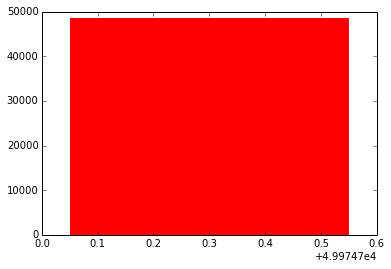

In [53]:
data = "befkbhalderkoencivst.csv"
with open(data) as file:
    reader = csv.reader(file)
    head_row = next(reader)
    
    distribution_male = {}
    distribution_female = {}
    distribution_gent = {}
    distribution_lady = {}
    
    gent = 0 # counters
    lady = 0
    male_age_18_30 = 0
    female_age_18_30 = 0
    for row in reader:
        age = int(row[2])
        sex = int(row[4])
        year = int(row[0])

        if age >= 18 and age <= 30:
            if sex == 1: # male
                male_age_18_30 += 1
            if sex == 2: # female
                female_age_18_30 += 1
        if age >= 50:
            if sex == 1:
                gent += 1
            if sex == 2:
                lady += 1

# show the distribution of the following four categories:
print("Females age 18 to 30: " + str(female_age_18_30))
print("Males age 18 to 30: " + str(male_age_18_30))
print("Females age 50 and over: " + str(lady))
print("Males age 50 and over: " + str(gent))

plt.bar(lady, gent, width=0.5, linewidth=0, align='center', color='red')
plt.show()

In [5]:
# Use matplotlib to plot a bar-char showing how many single males and females 
# of age 18 to 30, are living in BYDEL 1, 2 and 3 over the time 1992 - 2015
m_single = (dd[:, 3] == "U") & (dd[:, 4] == 1)
print(m_single)
f_single = (dd[:, 3] == "U") & (dd[:, 4] == 2)
print(f_single)

[ True False  True ..., False False False]
[False  True False ..., False  True False]


In [ ]:
# Find the three most populated city parts(BYDEL), in 1992, 2000 and 2015


In [ ]:
# Create to pie-charts, showing the distribution of marital status' 
# in bydel 1, 2 and 3 in year 2000 and 2015


In [ ]:
# Make a histogram of the age distribution in all of the municipality of Copenhangen
